In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
time_series= pd.read_csv('/content/timeseries.csv', parse_dates=True)
time_series.info()
#convert string Date time into Python Date time object.
time_series['date']= pd.to_datetime(time_series['date'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   week           104 non-null    int64  
 2   year           104 non-null    int64  
 3   date           104 non-null    object 
 4   total_revenue  104 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


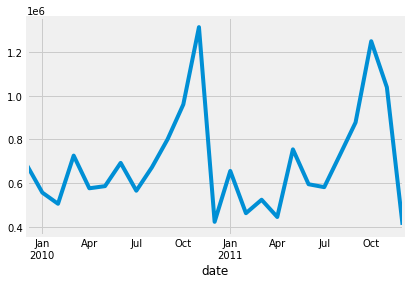

In [ ]:
#Aggregating the dataset at monthly basis.(resample function)
time_series= time_series.set_index('date')
monthly_series= time_series.total_revenue.resample('M').sum()
monthly_series.plot()


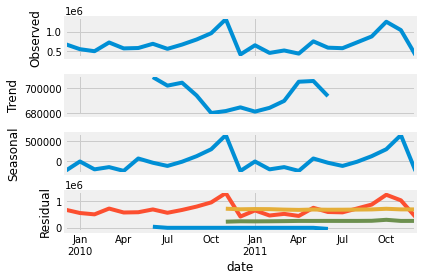

In [ ]:
components= sm.tsa.seasonal_decompose(monthly_series)
components.plot()
monthly_series.plot()
monthly_series.rolling(window=12).mean().plot()
monthly_series.rolling(window=12).std().plot()


In [ ]:
#Dickey–Fuller test tests the null hypothesis that a unit root is present  in an autoregressive time series model.
#If the p-value is lower than the threshold value (5% or 1%), we reject the null hypothesis and time series is stationary.
#If the p-value is higher than the threshold, we fail to reject the null hypothesis and time series is non-stationary.
ad_fuller_test= sm.tsa.stattools.adfuller(monthly_series,autolag='AIC')
print('ADF Statistic: %f' % ad_fuller_test[0])
print('p-value: %f' % ad_fuller_test[1])


ADF Statistic: -3.653871
p-value: 0.004811


In [ ]:
fit1 = SimpleExpSmoothing(monthly_series).fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(monthly_series).fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(monthly_series).fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

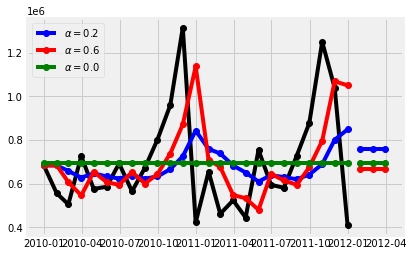

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
plt.plot(monthly_series, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


In [ ]:
fit1 = Holt(monthly_series).fit(
    smoothing_level=0.8, smoothing_slope=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")


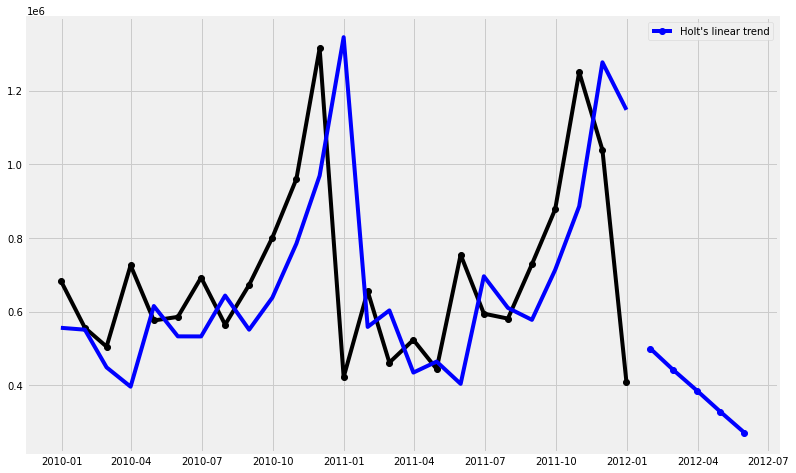

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(monthly_series, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")

plt.legend([line1], [fcast1.name])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


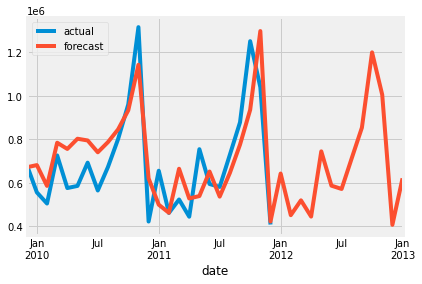

In [ ]:
import statsmodels as sm
sm.tsa.holtwinters.ExponentialSmoothing
model_expo3= sm.tsa.holtwinters.ExponentialSmoothing(monthly_series,trend='add',
                                                     seasonal='mul',seasonal_periods=12)

results_3= model_expo3.fit()
fit3= model_expo3.fit().predict(0,len(monthly_series))
forecast=model_expo3.fit().predict(0,len(monthly_series)+12)
monthly_series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend(loc='upperleft')



In [ ]:
mae3= abs(monthly_series- fit3).mean()
print(mae3)

mse3= (monthly_series- fit3)*(monthly_series- fit3)
ms3val=mse3.mean()
print(ms3val)



119224.79531298281
20722376455.51185
